# Exploratory Data Analysis for structured HDF5 files 
This notebook show us how to access HDF5 data from Python.  

In this case we going to use a structured HDF5 file to access to timestamps for an experiment. We going to explore Groups, Attributes and Dataset in the file and also we going to look at two examples to plot data.

In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib notebook

# Load Data

In [5]:
# filename = '../data/structured_data/structured_data_2018-01-25.hdf5'
filename = '../data/structured_data/structured_data_2018-04-18.hdf5'
hdf_file = h5py.File(filename, 'r')

# Groups
Groups are the HDF5 container object, analogous to folders in a filesystem. They can hold dataset or other groups.     

We can get information about the  groups using iterators of Python.

In [6]:
print('{:<25s}  {}'.format('GROUP','DESCRIPTION'))

for name, group in hdf_file.items():
    print('{:<25s}: {}'.format(name,group))

GROUP                      DESCRIPTION
response                 : <HDF5 group "/response" (8 members)>
stimulus                 : <HDF5 group "/stimulus" (2 members)>


In [7]:
print('{:<25s}  {}'.format('GROUP','DESCRIPTION'))
for name, group in hdf_file['/response/'].items():
    print('{:<25s}: {}'.format(name,group))

GROUP                      DESCRIPTION
checkerboard             : <HDF5 group "/response/checkerboard" (290 members)>
chirp                    : <HDF5 group "/response/chirp" (290 members)>
natural_image            : <HDF5 group "/response/natural_image" (290 members)>
natural_image_inv        : <HDF5 group "/response/natural_image_inv" (290 members)>
natural_image_shuffle    : <HDF5 group "/response/natural_image_shuffle" (290 members)>
natural_shuffle          : <HDF5 group "/response/natural_shuffle" (16 members)>
photopic                 : <HDF5 group "/response/photopic" (290 members)>
scotopic                 : <HDF5 group "/response/scotopic" (290 members)>


## Attriubutes
Attributes describe Groups and Dataset and with this  we can get information about our data.

In this example we will show the attributes of a particular protocols.

In [8]:
protocol_name = 'natural_image'
protocol = hdf_file['/response/'+protocol_name]
for name, value in protocol.attrs.items():
    print('Attr: {:<20}: {}'.format(name,value))

Attr: start_time          : 66491156
Attr: end_time            : 67093637
Attr: sample_rate         : 20000.0
Attr: duration            : 30.12405
Attr: presentation_number : 4


Above we can see differents attributes for the protocol selected, in this case we chose **'duration'** and **'sample_rate'**

In [9]:
time_stim = protocol.attrs['duration']
sample = protocol.attrs['sample_rate']

# Data sets
A dataset is similar to Numpy Array and we can use 'slicing', and 'steps' using the same way \[star:end:step\].    

Dataset and Numpy array are objets with atributs as f.size, f.shape, f.dtype.

For example we can take all timestamp in a single template for the checkerboar protocol. 

In [9]:
units = [unit for unit in hdf_file['/response/checkerboard']]

print('Some units in the protocol: \n    {}\n'.format(units[:5]))

dataset_path = '/response/checkerboard/temp_0'

print('Dataset object: \n '+str(hdf_file[dataset_path]))
print('Dataset values: \n '+str(hdf_file[dataset_path][...]))

Some units in the protocol: 
    ['temp_0', 'temp_1', 'temp_10', 'temp_100', 'temp_101']

Dataset object: 
 <HDF5 dataset "temp_0": shape (1137,), type "<f8">
Dataset values: 
 [8.1090000e+03 2.2542000e+04 3.1662000e+04 ... 2.4062604e+07 2.4066575e+07
 2.4084811e+07]


# Examples

Examples has a slider to change the unit to analize. It's a nice way to interact easyly with the data.

In [14]:
# protocol_name = '/response/chirp'
protocol_name = '/response/natural_image'
protocol = hdf_file[protocol_name]
nunits = len(protocol)
time_stim = protocol.attrs['duration']
sample = protocol.attrs['sample_rate']


## Plot raster for a single unit

<IPython.core.display.Javascript object>


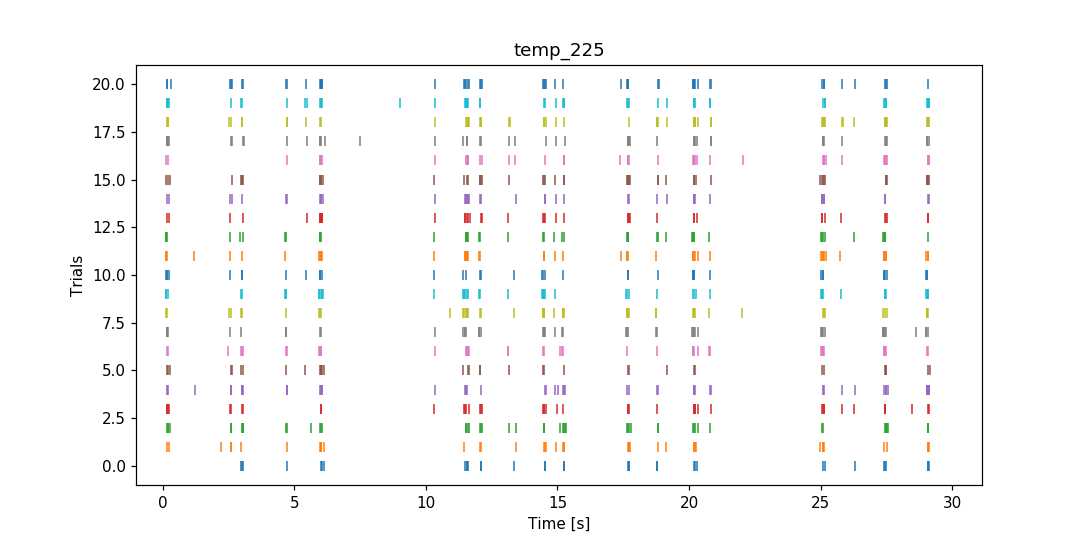

In [15]:
number_unit = 225
unit = 'temp_{}'.format(number_unit)
repetitions = protocol[unit]

plt.figure(figsize=(10,5))
for kidx,krep in enumerate(repetitions):
    data_plot = repetitions[krep][...]/sample
    plt.plot(data_plot,kidx*np.ones_like(data_plot),marker='|',linestyle='')
plt.xlim([-1,time_stim+1])
plt.title(unit)
plt.xlabel('Time [s]')
plt.ylabel('Trials')
plt.show()

## Plot psth for a single unit

<IPython.core.display.Javascript object>


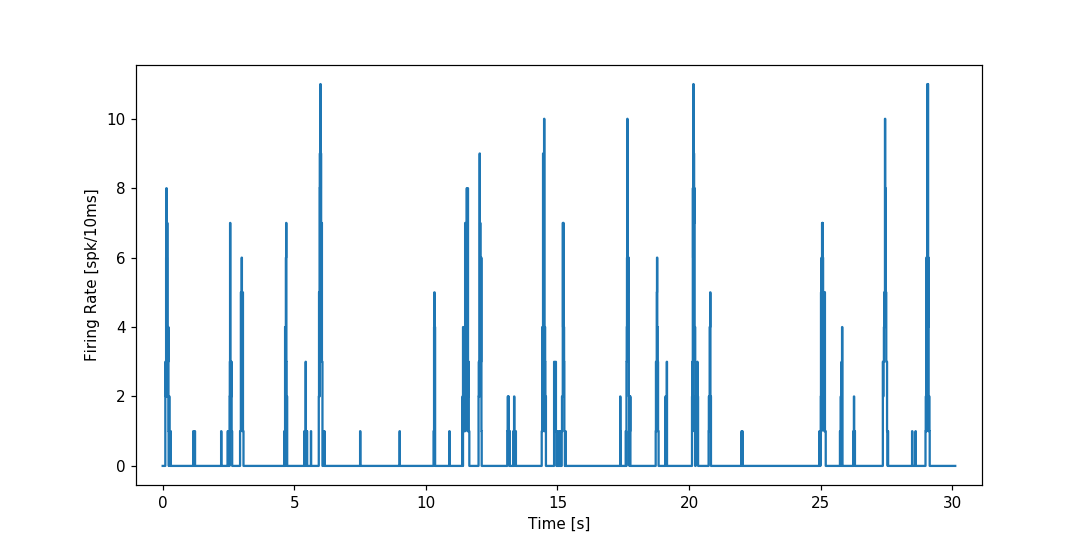

In [16]:
spikes = []
for ktrial,kvalues in repetitions.items():
    spikes += list(kvalues/sample)

plt.figure(figsize=(10,5))
ncount,bins = np.histogram(spikes,bins=int(time_stim*100),range=(0,time_stim))
plt.step(bins[:-1],ncount)
plt.xlim([-1,time_stim+1])
plt.xlabel('Time [s]')
plt.ylabel('Firing Rate [spk/10ms]')
plt.show()  

# Response and stimulus together
Finally we can merge the response with the stimulus to show them together.
## Example Chirp protocol

<IPython.core.display.Javascript object>


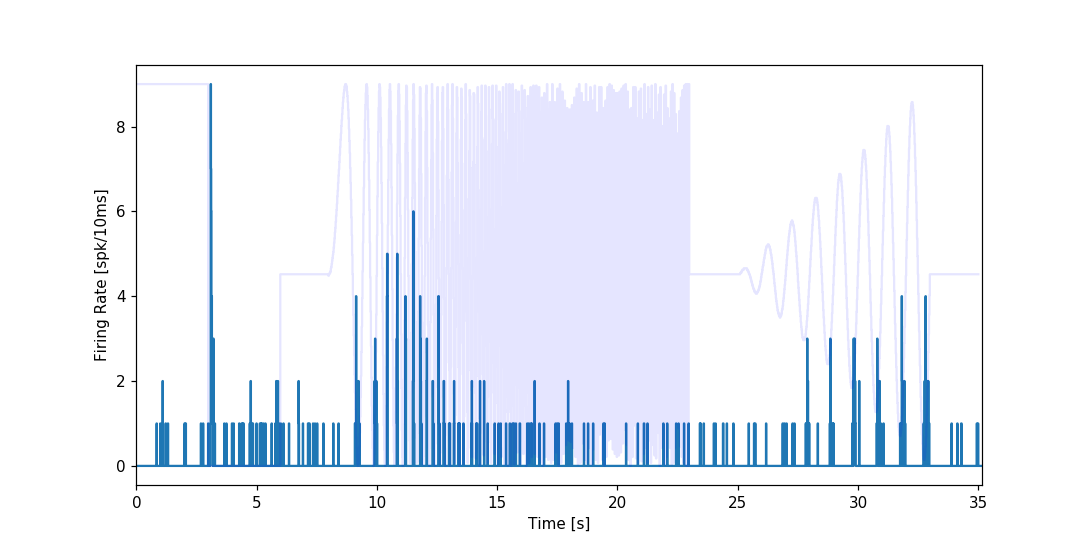

In [17]:
protocol_name = 'chirp'
nunber_unit = 221
# stimulus
stim = hdf_file['/stimulus/'+protocol_name][...]
stim_amp, stim_time = stim[0,:]/255.0,stim[1,:]

# response
protocol = hdf_file['/response/'+protocol_name]
units = [unit for unit in protocol]
repetitions = protocol[units[nunber_unit]]

time_stim = protocol.attrs['duration']
sample_stim = protocol.attrs['sample_rate']

# get the all spike in repetitions
spikes = []
for ktrial,kvalues in repetitions.items():
    spikes += list(kvalues/sample)
# Plot figure
plt.figure(figsize=(10,5))
ncount,bins = np.histogram(spikes,bins=int(time_stim*100),range=(0,time_stim))
plt.step(bins[:-1],ncount)
plt.step(stim_time,stim_amp*np.max(ncount),alpha=0.1,color='b')
plt.xlim([0,time_stim])
plt.xlabel('Time [s]')
plt.ylabel('Firing Rate [spk/10ms]')
plt.show()   

In [ ]:
hdf_file.close()